# <u>Pastry Object Detection with TFOD</u>

**OBJECTIVE** : The main goal of this notebook is to train a object detection model to optimally detect 10 different types of pastries and then export the trained model. The model used is the SSD-MobileNet which is optimized for using on edge devices.

#### NOTE : The below mentioned steps are executed in combination with various other steps which are not mentioned here. The training process is referenced from the following video : https://youtu.be/XoMiveY_1Z4

## 1. Install Tensorflow and Check for GPU

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
# check if TF detected GPU 
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


## 2. Clone TFOD Github repository

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 68293, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 68293 (delta 14), reused 25 (delta 7), pack-reused 68258
Receiving objects: 100% (68293/68293), 576.54 MiB | 14.08 MiB/s, done.
Resolving deltas: 100% (47976/47976), done.


In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

## 3. Clone and Install COCO-API Github repository

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 13.96 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [ ]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-Y7dWVB/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-Y7dWVB/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

In [ ]:
cp -r pycocotools /content/models/research

In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
pwd

'/content/models/research'

## 4. Install TF Object Detection API

In [ ]:
cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install .

Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.9 MB 5.6 MB/s 
     |████████████████████████████████| 352 kB 47.5 MB/s 
     |████████████████████████████████| 1.8 MB 36.3 MB/s 
     |████████████████████████████████| 23.1 MB 63.1 MB/s 
     |████████████████████████████████| 1.2 MB 46.0 MB/s 
     |████████████████████████████████| 90 kB 8.2 MB/s 
     |████████████████████████████████| 99 kB 6.4 MB/s 
     |████████████████████████████████| 4.9 MB 41.9 MB/s 
     |████████████████████████████████| 47.7 MB 1.6 MB/s 
     |████████████████████████████████| 213 kB 46.

In [ ]:
cd /content/models/research/

/content/models/research


In [ ]:
pwd

'/content/models/research'

In [ ]:
# necessary orelse some commands will fail
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 4.1 MB/s 
     |████████████████████████████████| 15.7 MB 18.8 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which i

## 5. Test TF Object Detection API Installation Sucess

In [ ]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-12-30 10:46:42.842899: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W1230 10:46:43.299141 139939969668992 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.4s
I1230 10:46:43.654187 139939969668992 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.4s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.67s
I1230 10:46:44.321316 139939969668992 test_u

In [ ]:
cd /content/drive/MyDrive/fiverr-hasijayawardana/training_demo/pre-trained-models 

/content/drive/MyDrive/fiverr-hasijayawardana/training_demo/pre-trained-models


## 6. Download Pre-trained model from TF Model Zoo

**The reference link to TF model zoo :** https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2021-12-30 10:47:17--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.204.128, 2404:6800:4008:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.204.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90453990 (86M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_mobilenet_v1_fp 100%[===================>]  86.26M  56.4MB/s    in 1.5s    

2021-12-30 10:47:19 (56.4 MB/s) - ‘ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [90453990/90453990]



In [ ]:
!tar -xvf ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [ ]:
cd /content/drive/MyDrive/fiverr-hasijayawardana/training_demo

/content/drive/MyDrive/fiverr-hasijayawardana/training_demo


In [ ]:
pwd

'/content/drive/My Drive/fiverr-hasijayawardana/training_demo'

## 7. Generate TF Records

In [ ]:
# Create train data:
!python generate_tfrecord.py -x /content/drive/MyDrive/fiverr-hasijayawardana/training_demo/images/train -l /content/drive/MyDrive/fiverr-hasijayawardana/training_demo/annotations/label_map.pbtxt -o /content/drive/MyDrive/fiverr-hasijayawardana/training_demo/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/drive/MyDrive/fiverr-hasijayawardana/training_demo/images/test -l /content/drive/MyDrive/fiverr-hasijayawardana/training_demo/annotations/label_map.pbtxt -o /content/drive/MyDrive/fiverr-hasijayawardana/training_demo/annotations/test.record

Successfully created the TFRecord file: /content/drive/MyDrive/fiverr-hasijayawardana/training_demo/annotations/train.record
Successfully created the TFRecord file: /content/drive/MyDrive/fiverr-hasijayawardana/training_demo/annotations/test.record


In [ ]:
pwd

'/content/drive/My Drive/fiverr-hasijayawardana/training_demo'

In [ ]:
pip install numpy==1.19.5

     |████████████████████████████████| 14.8 MB 4.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install pip install opencv-python==4.5.5.62

     |████████████████████████████████| 60.4 MB 1.5 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## 8. Training the model

The below command started training of the object detection model

In [ ]:
!python model_main_tf2.py --model_dir=/content/drive/MyDrive/fiverr-hasijayawardana/training_demo/models/my_ssd_resnet101_v1_fpn --pipeline_config_path=/content/drive/MyDrive/fiverr-hasijayawardana/training_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1230 14:47:27.140376 139915093378944 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I1230 14:47:27.149710 139915093378944 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1230 14:47:27.149936 139915093378944 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W1230 14:47:27.327127 139915093378944 deprecation.py:347] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experimental_distribute_datasets_from_function (from tensorflow.python.distribute.distribute_lib) is deprecated and will be removed in a future version.
Instructions for updating:
rename to distribute_datasets_from_function
INFO

In [ ]:
pwd

'/content/drive/My Drive/fiverr-hasijayawardana/training_demo'

## 9. Exporting the trained model

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/fiverr-hasijayawardana/training_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config --trained_checkpoint_dir /content/drive/MyDrive/fiverr-hasijayawardana/training_demo/models/my_ssd_resnet101_v1_fpn --output_directory /content/drive/MyDrive/fiverr-hasijayawardana/training_demo/exported_models/my_model

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1230 15:55:01.210629 140093449328512 deprecation.py:619] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:464: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1230 15:55:24.199627 140093449328512 save_impl.py:72] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7f69705dbfd0>, because it is not built.
W1230 15:55:47.716455 140093449328512 

In [ ]:
!pip install opencv-python==4.5.5.62

## 10. Running Inference using Trained model

Loading model...Done! Took 14.51315450668335 seconds
Running inference for /content/IMG_9969.JPG... [8 7 8 7 5 5 1 7 7 7 1 5 5 8 5 7 7 5 7 2 9 5 8 8 5 2 8 8 5 5 7 7 8 7 5 7 5
 7 3 4 8 5 5 8 7 9 8 5 7 8 5 7 5 7 5 5 7 2 9 2 6 8 5 7 5 5 7 9 1 6 8 2 7 7
 5 8 7 8 5 5 5 5 6 7 8 5 7 8 8 5 5 7 7 5 7 1 8 1 7 7]
[0.998587   0.9818178  0.94941944 0.91018194 0.89642185 0.70538795
 0.63480157 0.5705415  0.27009073 0.26208586 0.21315412 0.1792617
 0.17174156 0.16986585 0.14817931 0.14327037 0.13101724 0.12450282
 0.12184862 0.1214162  0.11264921 0.10499221 0.10235083 0.09348837
 0.08470374 0.08302752 0.07393895 0.07240818 0.07048815 0.06987218
 0.06924762 0.06785595 0.06691721 0.06673201 0.06628767 0.063577
 0.06050759 0.05834277 0.05725054 0.05719559 0.05575497 0.05511132
 0.05491703 0.05322259 0.05287582 0.05262359 0.05120454 0.05082202
 0.05030527 0.04989809 0.04953938 0.04891273 0.0488324  0.04855935
 0.04807197 0.04752853 0.04686911 0.04668878 0.04651182 0.04506795
 0.04499696 0.04494589 0.0441

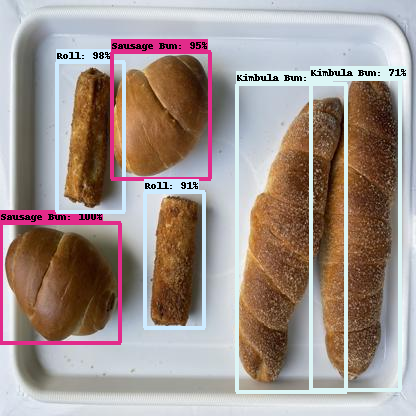

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/IMG_9969.JPG'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/drive/MyDrive/fiverr-hasijayawardana/saved_model (8000 epochs)/'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/drive/MyDrive/fiverr-hasijayawardana/training_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

print(detections['detection_classes'])
print(detections['detection_scores'])

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.65,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED


## Conclusion : We have sucessfully trained a object detection model and exported it.